In [1]:
#libs
import pandas as pd 
import os 
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
# Importando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pytz

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM, Dropout
#from sklearn.preprocessing import MinMaxScaler
import math

from bcb import currency
from bcb import sgs

import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns

In [2]:
df = pd.read_pickle(r'C:\Users\Luiz Philipe Rangel\Documents\GitHub\grupo_2_tera\projeto_principal\main\mastertable.pkl')

In [3]:
#atualizando os preços a partir do ipca
df['notionalusd_ipca'] = (df['notional_usd']*df['ipca'])/df['ipca_acumulado']

In [4]:
df

anomes mercadoria                            tipo  \
data_referencia                                                     
2019-07-24       20197       OLEO     NY HARBOR ULSD FUTURES (HO)   
2019-07-24       20197       OLEO     NY HARBOR ULSD FUTURES (HO)   
2019-07-24       20197       OLEO     NY HARBOR ULSD FUTURES (HO)   
2019-07-24       20197       OLEO     NY HARBOR ULSD FUTURES (HO)   
2019-07-24       20197       OLEO     NY HARBOR ULSD FUTURES (HO)   
...                ...        ...                             ...   
2022-05-18       20225   PETROLEO  PRIMEIRO FUTURO OLEO CRU-BRENT   
2022-05-18       20225   PETROLEO  PRIMEIRO FUTURO OLEO CRU-BRENT   
2022-05-18       20225   PETROLEO  PRIMEIRO FUTURO OLEO CRU-BRENT   
2022-05-18       20225   PETROLEO  PRIMEIRO FUTURO OLEO CRU-BRENT   
2022-05-18       20225   PETROLEO  PRIMEIRO FUTURO OLEO CRU-BRENT   

                       bolsa unidade_negociacao      moeda  \
data_referencia                                              
2019-07-24             NYMEX              GALAO  (220) USD   
2019-07-24             NYMEX              GALAO  (220) USD   
2019-07-24             NYMEX              GALAO  (220) USD   
2019-07-24             NYMEX              GALAO  (220) USD   
2019-07-24             NYMEX              GALAO  (220) USD   
...                      ...                ...        ...   
2022-05-18       ICE (NYBOT)             BARRIL  (220) USD   
2022-05-18       ICE (NYBOT)             BARRIL  (220) USD   
2022-05-18       ICE (NYBOT)             BARRIL  (220) USD   
2022-05-18       ICE (NYBOT)             BARRIL  (220) USD   
2022-05-18       ICE (NYBOT)             BARRIL  (220) USD   

                 quantidade_negociada comprador_vendedor cod_ric cod_ticker  \
data_referencia                                                               
2019-07-24                    3444000  Mercado x Cliente    HOH0       HOH0   
2019-07-24                    3444000  Mercado x Cliente    HOX0       HOX0   
2019-07-24                    3444000  Mercado x Cliente    HOJ1       HOJ1   
2019-07-24                    3444000  Mercado x Cliente    HOV9       HOV9   
2019-07-24                    3444000  Mercado x Cliente    HOX9       HOX9   
...                               ...                ...     ...        ...   
2022-05-18                      31000  Mercado x Cliente   LCOV2       COV2   
2022-05-18                      31000  Mercado x Cliente   LCOV3       COV3   
2022-05-18                      31000  Mercado x Cliente   LCOX2       COX2   
2022-05-18                      31000  Mercado x Cliente   LCOX3       COX3   
2022-05-18                      31000  Mercado x Cliente   LCOZ2       COZ2   

                 ...  valor_cotacao     usd  notional_usd  notional_brl  mes  \
data_referencia  ...                                                           
2019-07-24       ...         1.9152  3.7596     6595948.8  2.479813e+07    7   
2019-07-24       ...         1.8636  3.7596     6418238.4  2.413001e+07    7   
2019-07-24       ...         1.8315  3.7596     6307686.0  2.371438e+07    7   
2019-07-24       ...         1.9676  3.7596     6776414.4  2.547661e+07    7   
2019-07-24       ...         1.9630  3.7596     6760572.0  2.541705e+07    7   
...              ...            ...     ...           ...           ...  ...   
2022-05-18       ...       102.3300  4.9592     3172230.0  1.573172e+07    5   
2022-05-18       ...        88.9900  4.9592     2758690.0  1.368090e+07    5   
2022-05-18       ...       100.4600  4.9592     3114260.0  1.544424e+07    5   
2022-05-18       ...        88.3200  4.9592     2737920.0  1.357789e+07    5   
2022-05-18       ...        98.7600  4.9592     3061560.0  1.518289e+07    5   

                  ano  ipca  ipca_acumulado  notionalusd_ipca  \
data_referencia                                                 
2019-07-24       2019  0.19             2.4     522179.280000   
2019-07-24       2019  0.19             2.4    

In [6]:
agrupmerc = df.groupby(['mercadoria'])['quantidade_negociada'].sum()
merc_maiores = agrupmerc.sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='mercadoria'>

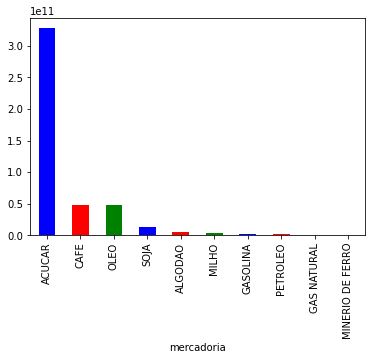

In [7]:
# Gráfico de barras das maiores COMODITIES negociadas
merc_maiores.plot.bar(color = ['blue','red', 'green'])

In [8]:
acucar = df.loc[df['mercadoria'] == 'ACUCAR']
acucar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53639 entries, 2019-08-23 to 2022-05-17
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anomes                53639 non-null  object 
 1   mercadoria            53639 non-null  object 
 2   tipo                  53639 non-null  object 
 3   bolsa                 53639 non-null  object 
 4   unidade_negociacao    53639 non-null  object 
 5   moeda                 53639 non-null  object 
 6   quantidade_negociada  53639 non-null  int64  
 7   comprador_vendedor    53639 non-null  object 
 8   cod_ric               53639 non-null  object 
 9   cod_ticker            52015 non-null  object 
 10  fator_conversao       53639 non-null  float64
 11  valor_cotacao         53639 non-null  float64
 12  usd                   53639 non-null  float64
 13  notional_usd          53639 non-null  float64
 14  notional_brl          53639 non-null  float64
 15  me

In [9]:
acucar

anomes mercadoria       tipo        bolsa unidade_negociacao  \
data_referencia                                                                
2019-08-23       20198     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2019-08-23       20198     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2019-08-23       20198     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2019-08-23       20198     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2019-08-23       20198     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
...                ...        ...        ...          ...                ...   
2022-05-17       20225     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2022-05-17       20225     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2022-05-17       20225     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2022-05-17       20225     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   
2022-05-17       20225     ACUCAR  NUMERO 11  ICE (NYBOT)              POUND   

                     moeda  quantidade_negociada comprador_vendedor cod_ric  \
data_referencia                                                               
2019-08-23       (220) USD               1120000  Mercado x Mercado   SBV1F   
2019-08-23       (220) USD               1120000  Mercado x Mercado    SBV0   
2019-08-23       (220) USD               1120000  Mercado x Mercado    SBK1   
2019-08-23       (220) USD               1120000  Mercado x Mercado    SBV9   
2019-08-23       (220) USD               1120000  Mercado x Mercado    SBK0   
...                    ...                   ...                ...     ...   
2022-05-17       (220) USD               2240000  Mercado x Cliente    SBN3   
2022-05-17       (220) USD               2240000  Mercado x Cliente    SBN4   
2022-05-17       (220) USD               2240000  Mercado x Cliente    SBV2   
2022-05-17       (220) USD               2240000  Mercado x Cliente    SBV3   
2022-05-17       (220) USD               2240000  Mercado x Cliente    SBV4   

                cod_ticker  ...  valor_cotacao     usd  notional_usd  \
data_referencia             ...                                        
2019-08-23             NaN  ...         0.1363  4.0851      152656.0   
2019-08-23            SBV0  ...         0.1295  4.0851      145040.0   
2019-08-23            SBK1  ...         0.1352  4.0851      151424.0   
2019-08-23            SBV9  ...         0.1147  4.0851      128464.0   
2019-08-23            SBK0  ...         0.1264  4.0851      141568.0   
...                    ...  ...            ...     ...           ...   
2022-05-17            SBN3  ...         0.1897  4.9676      424928.0   
2022-05-17            SBN4  ...         0.1787  4.9676      400288.0   
2022-05-17            SBV2  ...         0.2008  4.9676      449792.0   
2022-05-17            SBV3  ...         0.1866  4.9676      417984.0   
2022-05-17            SBV4  ...         0.1772  4.9676      396928.0   

                 notional_brl  mes   ano  ipca  ipca_acumulado  \
data_referencia                                                  
2019-08-23       6.236150e+05    8  2019  0.11            2.51   
2019-08-23       5.925029e+05    8  2019  0.11            2.51   
2019-08-23       6.185822e+05    8  2019  0.11            2.51   
2019-08-23       5.247883e+05    8  2019  0.11            2.51   
2019-08-23       5.783194e+05    8  2019  0.11            2.51   
...                       ...  ...   ...   ...             ...   
2022-05-17       2.110872e+06    5  2022  0.47           23.00   
2022-05-17       1.988471e+06    5  2022  0.47           23.00   
2022-05-17       2.234387e+06    5  2022  0.47           23.00   
2022-05-17       2.076377e+06    5  2022  0.47           23.00   
2022-05-17       1.971780e+06    5  2022  0.47           23.00   

                 notionalusd_ipca  notionalusd_norm  
data_referencia                                      
2019-08-23            6690.103586         -

In [10]:
acucar = acucar.resample('D').mean()

In [11]:
acucar = acucar.dropna()

In [18]:
# Criando um gŕafico personalizado
px.line(
    acucar,
    x= acucar.index,
    y=acucar.notionalusd_ipca,
    color='notionalusd_ipca',
    labels={'DATA INICIAL': acucar.index, 'PREÇO ATUALIZADO IPCA':'mercadoria'},
    title='Preços com IPCA do Açucar'
)

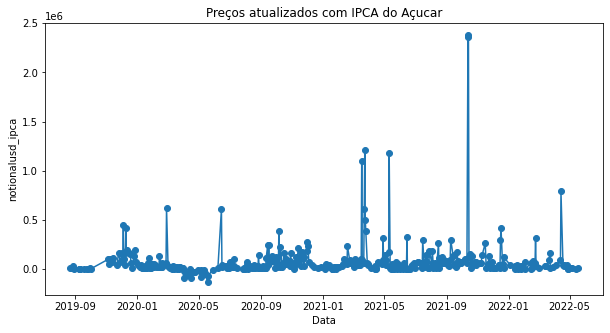

In [11]:
plt.figure(figsize=(10,5))
x = acucar.index
y = acucar.notionalusd_ipca
plt.xlabel('Data')
plt.ylabel('notionalusd_ipca')
plt.title('Preços atualizados com IPCA do Açucar')
plt.plot(x,y, marker='o');

In [12]:
#teste de dickey fuller
result_acucar = adfuller(acucar.notionalusd_ipca)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_adf[0]))
print('Valor-p: {:.10f}'.format(result_adf[1]))
print('Valores Críticos:')

for key, value in result_adf[4].items():
    print('\t{}: {:.4f}'.format(key, value))
    
if result_adf[0] < result_adf[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")        

Dickey-Fuller Aumentado


NameError: name 'result_adf' is not defined

<AxesSubplot:xlabel='data_referencia'>

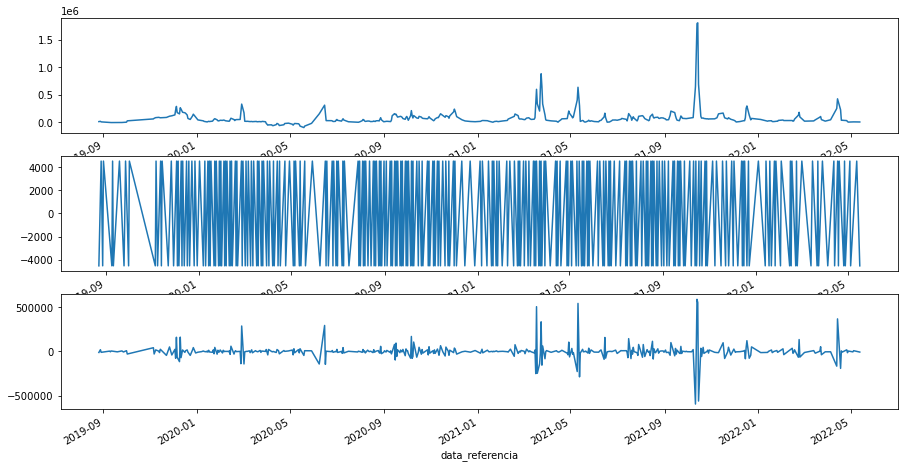

In [13]:
#decomposição temporaç
result_acucar = seasonal_decompose(acucar.notionalusd_ipca, model='aditive',period=2)
#Plotar em tamanho maior
fig, (ax2,ax3, ax4) = plt.subplots(3,1, figsize=(15,8))
#result_acucar.observed.plot(ax=ax1)
result_acucar.trend.plot(ax=ax2)
result_acucar.seasonal.plot(ax=ax3)
result_acucar.resid.plot(ax=ax4)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


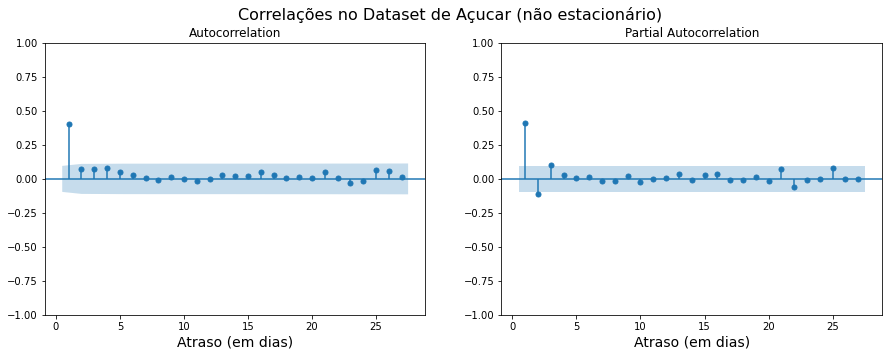

In [14]:
# Construindo os gráficos
fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
plot_acf(acucar.notionalusd_ipca,ax=ax[0],zero=False) # Precisamos indicar apenas a coluna com a série temporal em sí
ax[0].set_xlabel('Atraso (em dias)',size=14)
plot_pacf(acucar.notionalusd_ipca,ax=ax[1],zero=False) # Precisamos indicar apenas a coluna com a série temporal em sí
ax[1].set_xlabel('Atraso (em dias)',size=14)
plt.suptitle("Correlações no Dataset de Açucar (não estacionário)",size=16)
plt.show()

In [15]:
# O comando .diff() faz a diferença entre linhas consecutivas do dataset!
acucar['Diferenca'] = acucar.notionalusd_ipca.diff()


In [16]:
acucar.head()

quantidade_negociada  fator_conversao  valor_cotacao     usd  \
data_referencia                                                                 
2019-08-23               1.866667e+06             0.01       0.131800  4.0851   
2019-08-26               1.120000e+06             0.01       0.131362  4.1367   
2019-08-28               5.824000e+06             0.01       0.130838  4.1559   
2019-08-29               5.600000e+05             0.01       0.129600  4.1680   
2019-09-09               1.456000e+06             0.01       0.125830  4.0766   

                  notional_usd  notional_brl  ipca  ipca_acumulado  \
data_referencia                                                      
2019-08-23       246026.666667  1.005044e+06  0.11            2.51   
2019-08-26       147124.923077  6.086117e+05  0.11            2.51   
2019-08-28       762003.200000  3.166809e+06  0.11            2.51   
2019-08-29        72576.000000  3.024968e+05  0.11            2.51   
2019-09-09       183208.480000  7.468677e+05 -0.04            2.47   

                 notionalusd_ipca  notionalusd_norm     Diferenca  
data_referencia                                                    
2019-08-23           10782.045153         -0.171401           NaN  
2019-08-26            6447.705792         -0.179264  -4334.339361  
2019-08-28           33394.562550         -0.130378  26946.856758  
2019-08-29            3180.621514         -0.185191 -30213.941036  
2019-09-09           -2966.938947         -0.176395  -6147.560461

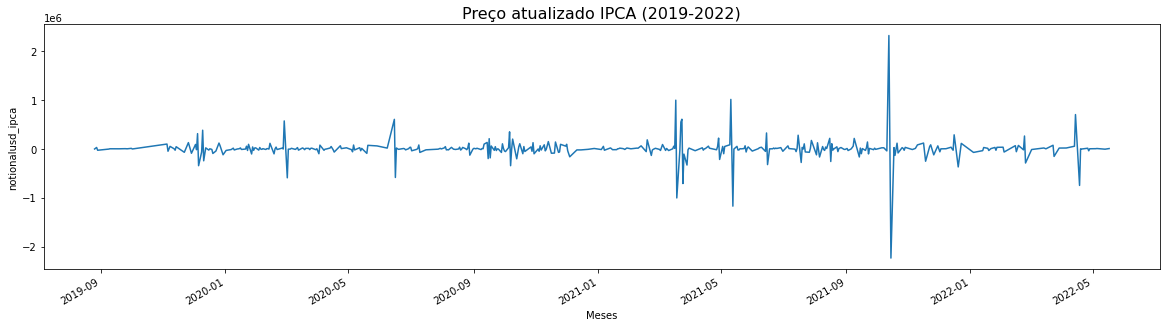

In [17]:
# Gráfico dos dados
plt.figure(figsize=(20,5))
acucar.Diferenca.plot(kind='line')
plt.xlabel('Meses')
plt.ylabel('notionalusd_ipca')
plt.title('Preço atualizado IPCA (2019-2022)',size=16)
plt.show()

In [18]:
# Testando estacionariedade
teste_diferenca = adfuller(acucar.Diferenca.dropna()) # O primeiro registro é NaN então excluímos!
print('p-valor (<.05 indica estacionariedade) desta série é {}'.format(teste_diferenca[1]))


p-valor (<.05 indica estacionariedade) desta série é 1.9514717594962337e-14


In [19]:
#função para plotar correlação
def plota_correlacoes(dataset, nome_dataset, unidade):
    fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
    plot_acf(dataset,ax=ax[0],lags=10,zero=False) # Sem a ACF(0)
    ax[0].set_xlabel('Atraso (em {})'.format(unidade),size=14)
    plot_pacf(dataset,ax=ax[1],lags=8,zero=False) # Sem a PACF(0)
    ax[1].set_xlabel('Atraso (em {})'.format(unidade),size=14)
    plt.suptitle("Correlações no Dataset de {}".format(nome_dataset,size=16))
    plt.show()
    return None # Não precisamos retornar nada

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


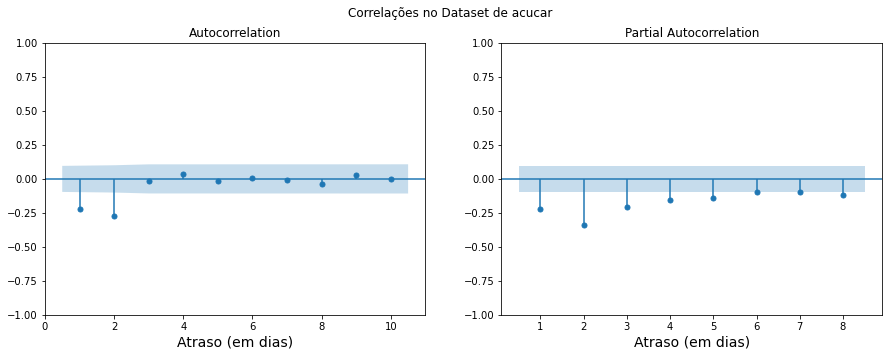

In [20]:
# Construindo novamente o ACF e o PACF
plota_correlacoes(acucar.Diferenca.dropna(), unidade='dias',nome_dataset='acucar')

In [134]:
#Podemos caputrar a informação de linhas acima ou abaixo de uma linha específica usando o método pd.shift()
def constroi_features_defasadas(base,lista_features,defasagem_maxima):
    # Constrói features defasadas com base na base original
    # Copia a base
    base_cop = base.copy()
    for feat in lista_features:       
        for i in range(1,defasagem_maxima+1):
            base_cop[str(feat)+'_def_'+str(i)] = base_cop[feat].shift(i)
    return base_cop

In [135]:
acucar_eng = constroi_features_defasadas(acucar,['notional_usd','valor_cotacao','quantidade_negociada','ipca_acumulado'],30)

In [136]:
print('Colunas antes do feature engineering: {}'.format(acucar.shape[-1]))
print('Colunas antes do feature engineering: {}'.format(acucar_eng.shape[-1]))

Colunas antes do feature engineering: 11
Colunas antes do feature engineering: 131


In [137]:
acucar_eng

quantidade_negociada  fator_conversao  valor_cotacao     usd  \
data_referencia                                                                 
2019-08-23               1.866667e+06             0.01       0.131800  4.0851   
2019-08-26               1.120000e+06             0.01       0.131362  4.1367   
2019-08-28               5.824000e+06             0.01       0.130838  4.1559   
2019-08-29               5.600000e+05             0.01       0.129600  4.1680   
2019-09-09               1.456000e+06             0.01       0.125830  4.0766   
...                               ...              ...            ...     ...   
2022-04-28               5.600000e+05             0.01       0.184092  5.0110   
2022-05-04               1.866667e+06             0.01       0.185517  5.0093   
2022-05-05               3.360000e+06             0.01       0.182091  5.0051   
2022-05-13               1.120000e+06             0.01       0.184427  5.1075   
2022-05-17               2.240000e+06             0.01       0.190918  4.9676   

                  notional_usd  notional_brl  ipca  ipca_acumulado  \
data_referencia                                                      
2019-08-23       246026.666667  1.005044e+06  0.11            2.51   
2019-08-26       147124.923077  6.086117e+05  0.11            2.51   
2019-08-28       762003.200000  3.166809e+06  0.11            2.51   
2019-08-29        72576.000000  3.024968e+05  0.11            2.51   
2019-09-09       183208.480000  7.468677e+05 -0.04            2.47   
...                        ...           ...   ...             ...   
2022-04-28       103091.333333  5.165907e+05  1.06           22.53   
2022-05-04       346297.777778  1.734709e+06  0.47           23.00   
2022-05-05       611825.454545  3.062248e+06  0.47           23.00   
2022-05-13       206558.545455  1.054998e+06  0.47           23.00   
2022-05-17       427656.727273  2.124428e+06  0.47           23.00   

                 notionalusd_ipca  notionalusd_norm  ...  \
data_referencia                                      ...   
2019-08-23           10782.045153         -0.171401  ...   
2019-08-26            6447.705792         -0.179264  ...   
2019-08-28           33394.562550         -0.130378  ...   
2019-08-29            3180.621514         -0.185191  ...   
2019-09-09           -2966.938947         -0.176395  ...   
...                           ...               ...  ...   
2022-04-28            4850.280219         -0.182765  ...   
2022-05-04            7076.519807         -0.163429  ...   
2022-05-05           12502.520158         -0.142318  ...   
2022-05-13            4220.978972         -0.174539  ...   
2022-05-17            8739.072253         -0.156961  ...   

                 ipca_acumulado_def_21  ipca_acumulado_def_22  \
data_referencia                                                 
2019-08-23                         NaN                    NaN   
2019-08-26                         NaN                    NaN   
2019-08-28                         NaN                    NaN   
2019-08-29                         NaN                    NaN   
2019-09-09                         NaN                    NaN   
...                                ...                    ...   
2022-04-28                       19.85                  19.85   
2022-05-04                       19.85                  19.85   
2022-05-05                       19.85                  19.85   
2022-05-13                       19.85                  19.85   
2022-05-17                       19.85                  19.85   

                 ipca_acumulado_def_23  ipca_acumulado_def_24  \
data_referencia                                                 
2019-08-23                         NaN                    NaN   
2019-08-26                         NaN                    NaN   
2019-08-28                         NaN                    NaN   
2019-08-29                         NaN                    NaN   
2019-09-09                         

In [138]:
#Assim como podemos construir as features usando o passado da base, podemos construir a variável resposta usando o futuro da base também!



In [139]:
def construcao_target(base,nome_feature_target,periodos_considerados):
    # Constrói a variável resposta usando feature_target agrupado pelo número periodos_considerados
    cols_target = []
    for i in range(periodos_considerados):
        nome_feature = nome_feature_target+'_'+str(i)
        cols_target.append(nome_feature)
        base[nome_feature] = base[nome_feature_target].shift(-i)
    # Consolidação final
    base['target'] = base[cols_target].mean(axis=1)
    # Retorna a base apenas com a coluna target, desconsiderando as demais
    return base.drop(cols_target,axis=1)
                   

In [140]:
#Vamos definir que nossa target será a previsão dos próximos 30 dias

In [141]:
base_com_target = construcao_target(acucar_eng,'notional_usd',30).dropna()

In [142]:
base_com_target

quantidade_negociada  fator_conversao  valor_cotacao     usd  \
data_referencia                                                                 
2019-12-17               4.480000e+06             0.01       0.137789  4.0687   
2019-12-19               4.076800e+06             0.01       0.139822  4.0633   
2019-12-20               1.545600e+06             0.01       0.139900  4.0777   
2019-12-23               3.360000e+05             0.01       0.139433  4.0757   
2019-12-26               3.416000e+06             0.01       0.139678  4.0601   
...                               ...              ...            ...     ...   
2022-04-28               5.600000e+05             0.01       0.184092  5.0110   
2022-05-04               1.866667e+06             0.01       0.185517  5.0093   
2022-05-05               3.360000e+06             0.01       0.182091  5.0051   
2022-05-13               1.120000e+06             0.01       0.184427  5.1075   
2022-05-17               2.240000e+06             0.01       0.190918  4.9676   

                  notional_usd  notional_brl  ipca  ipca_acumulado  \
data_referencia                                                      
2019-12-17       617294.222222  2.511585e+06  1.15            4.23   
2019-12-19       570027.235556  2.316192e+06  1.15            4.23   
2019-12-20       216229.440000  8.817188e+05  1.15            4.23   
2019-12-23        46849.600000  1.909449e+05  1.15            4.23   
2019-12-26       477139.288889  1.937233e+06  1.15            4.23   
...                        ...           ...   ...             ...   
2022-04-28       103091.333333  5.165907e+05  1.06           22.53   
2022-05-04       346297.777778  1.734709e+06  0.47           23.00   
2022-05-05       611825.454545  3.062248e+06  0.47           23.00   
2022-05-13       206558.545455  1.054998e+06  0.47           23.00   
2022-05-17       427656.727273  2.124428e+06  0.47           23.00   

                 notionalusd_ipca  notionalusd_norm  ...  \
data_referencia                                      ...   
2019-12-17          167822.306278         -0.141883  ...   
2019-12-19          154971.943473         -0.145641  ...   
2019-12-20           58785.781560         -0.173770  ...   
2019-12-23           12736.888889         -0.187237  ...   
2019-12-26          129718.719201         -0.153026  ...   
...                           ...               ...  ...   
2022-04-28            4850.280219         -0.182765  ...   
2022-05-04            7076.519807         -0.163429  ...   
2022-05-05           12502.520158         -0.142318  ...   
2022-05-13            4220.978972         -0.174539  ...   
2022-05-17            8739.072253         -0.156961  ...   

                 ipca_acumulado_def_22  ipca_acumulado_def_23  \
data_referencia                                                 
2019-12-17                        2.47                   2.47   
2019-12-19                        2.47                   2.47   
2019-12-20                        2.57                   2.47   
2019-12-23                        2.57                   2.57   
2019-12-26                        3.08                   2.57   
...                                ...                    ...   
2022-04-28                       19.85                  19.85   
2022-05-04                       19.85                  19.85   
2022-05-05                       19.85                  19.85   
2022-05-13                       19.85                  19.85   
2022-05-17                       19.85                  19.85   

                 ipca_acumulado_def_24  ipca_acumulado_def_25  \
data_referencia                                                 
2019-12-17                        2.47                   2.47   
2019-12-19                        2.47                   2.47   
2019-12-20                        2.47                   2.47   
2019-12-23                        2.47                   2.47   
2019-12-26                        2

In [143]:
#separar os dados em features e targets

In [144]:
X = base_com_target.drop('target',axis=1)
y = base_com_target.target

In [145]:
#Com scikit-learn, podemos usar o módulo TimeSeriesSplit para fazer validação cruzada

In [146]:
from sklearn.model_selection import TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=5).split(X,y)
ts

<generator object TimeSeriesSplit.split at 0x0000019AD0ABD430>

In [147]:
#Temos um objeto split, como em um KFold usado em validações cruzadas de problemas não temporais. Vamos checar o tamanho de cada fold a cada iteração

In [148]:
i=1
for train_index, test_index in TimeSeriesSplit(n_splits=5).split(X,y):
    #print(train_index)
    print('Fold '+str(i))
    print('Conjunto de treino: '+str(len(X.iloc[train_index]))+' registros')
    print('Conjunto de teste: '+str(len(X.iloc[test_index]))+' registros')
    print('---')
    i = i+1

Fold 1
Conjunto de treino: 69 registros
Conjunto de teste: 64 registros
---
Fold 2
Conjunto de treino: 133 registros
Conjunto de teste: 64 registros
---
Fold 3
Conjunto de treino: 197 registros
Conjunto de teste: 64 registros
---
Fold 4
Conjunto de treino: 261 registros
Conjunto de teste: 64 registros
---
Fold 5
Conjunto de treino: 325 registros
Conjunto de teste: 64 registros
---


Ainda precisamos separar dados que o modelo nunca terá acesso, mesmo na validação cruzada. Como temos dados temporais e queremos testar a performance no futuro, faremos uma separação Out of time

In [149]:
# Temos quatro anos na base (2019-2022), então iremos separar os últimos 6 meses para teste
corte_treino_teste = '2021-09-01'
  
X_train = X[X.index<=corte_treino_teste]
X_test = X[X.index>corte_treino_teste]

y_train = y[y.index<=corte_treino_teste]
y_test = y[y.index>corte_treino_teste]

print('Tamanho do treino '+str(len(X_train)))
print('Tamanho do teste '+str(len(X_test)))

Tamanho do treino 300
Tamanho do teste 89


Escolhendo uma métrica e encontrando o modelo ideal

- mean_squared_error ou MSE: Média das diferenças entre a variável verdadeira e a predita ao quadrado. Quanto menor, melhor!
- mean_absolute_error ou MAE: Média das diferenças entre a variável verdadeira e a predita em módulo. Quanto menor, melhor!
- root_mean_squared_error ou RMSE: Raíz quadrada do mean_squared_error. Quanto menor, melhor!
- r2_score ou apenas r2: Percentual da variância total da variável resposta que pode ser explicada pelo modelo além do que a média já explica. Quanto maior, melhor!

OBS: Em séries temporais, há uma grande preferência por uso de métricas com escala, como o MAE ou o RMSE. Para este problema, inicialmente, iremos usar o MAE

Escolhendo alguns modelos para avaliar a nossa métrica e escolher o melhor

In [150]:
# Módulos de manipulação de dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que iremos testar
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [151]:
modelos_candidatos = {'Árvore':DecisionTreeRegressor(max_depth=5),
                      'RandomForest':RandomForestRegressor(max_depth=5),
                      'LGBM':LGBMRegressor(max_depth=5)
                     }

Vamos usar crossvalidação temporal e a métrica MAE para avaliar a performance destes modelos e fazer um gráfico

In [152]:
avaliacao = {}
for nome,model in modelos_candidatos.items():
    # Avalia a crossvalidação
    score = cross_val_score(model, # Escolhendo o nosso modelo da vez
                            X_train, y_train, # Nossos dados, excluindo o teste
                            cv=TimeSeriesSplit(n_splits=5), # Validação cruzada temporal
                            scoring='neg_mean_absolute_error', # Usando a métrica MAE
                           n_jobs=8 # Número de processadores, para ser mais rápido
                           ).mean() # Tirando a média de todos os folds
    avaliacao[nome] = -score # -score e não score para tornar o número positivo

In [153]:
avaliacao

{'Árvore': 337746.40846183867,
 'RandomForest': 330098.7321825159,
 'LGBM': 319481.935383894}

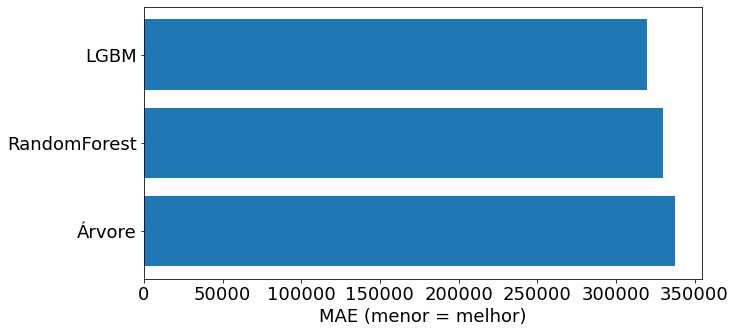

In [154]:
plt.figure(figsize=(10,5))
plt.barh(*zip(*avaliacao.items()))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MAE (menor = melhor)',size=18)
plt.show()

Pelo gráfico acima, o modelo que parece ter sido o melhor com os hiperparâmetros usados é o LGBM! Então vamos escolher este modelo para otimização

Seleção de variáveis: inferindo a janela ideal de defasagem
Na grande maioria dos problemas de séries temporais, as bases de dados não são tão grandes assim, exceto em casos em que a captura de dados é muito alta (dados em segundos, milisegundos, etc.) Entretanto, dependendo do cenário, podemos ter bases de dados com muitas features

In [191]:
# Vamos definir uma função de dataprep

def dataprep(base, defasagem_passado, defasagem_futuro):
    # Partindo da nossa base inicial (dados diarios)
    b1 = base.copy()
    # Eliminando missings
    b2 = b1.dropna()
    # Vamos construir features até defasagem_passado períodos atrás
    b3 = constroi_features_defasadas(b2,['notional_usd','valor_cotacao','quantidade_negociada','ipca_acumulado'],defasagem_passado)
    # E também uma variável target nos defasagem_futuro períodos seguintes
    b4 = construcao_target(b3,'notional_usd',defasagem_futuro)
    return b4.dropna()

In [192]:
# testando alguns tamanhos de base
for i in [10,15,20,30,45,60]:
    base_prep = dataprep(acucar,i,30)
    print('Número de features com '+str(i)+' defasagens: {}'.format(base_prep.shape[-1]))

Número de features com 10 defasagens: 52
Número de features com 15 defasagens: 72
Número de features com 20 defasagens: 92
Número de features com 30 defasagens: 132
Número de features com 45 defasagens: 192
Número de features com 60 defasagens: 252


Até mesmo pensando em implantação de modelos, muitas features podem tornar o modelo pesado e complexo, então de alguma maneira temos que fazer uma seleção de variáveis baseada nos resultados que temos. Uma forma bacana é analisarmos se nossa performance melhora muito na medida em que usamos mais features para o modelo



In [193]:
avaliacao = []
for i in range(15,90,15): # Testando de 15 a 90 dias de defasagem, variando de 15 em 15
    # Prepara a base
    base_avaliacao = dataprep(acucar,i,30) # i defasagens para trás, 30 para frente
    X = base_avaliacao.drop('target',axis=1)
    y = base_avaliacao.target
    X_train = X[X.index<=corte_treino_teste]
    X_test = X[X.index>corte_treino_teste]
    y_train = y[y.index<=corte_treino_teste]
    y_test = y[y.index>corte_treino_teste]
    score = cross_val_score(LGBMRegressor(max_depth=5), # Escolhendo o nosso modelo da vez
                            X_train, y_train, # Nossos dados, excluindo o teste
                            cv=TimeSeriesSplit(n_splits=5), # Validação cruzada temporal
                            scoring='neg_mean_absolute_error', # Usando a métrica MAE
                            n_jobs=8 # Número de processadores, só para ir mais rápido
                           ).mean() # Tirando a média de todos os folds
    avaliacao.append((i,-score))


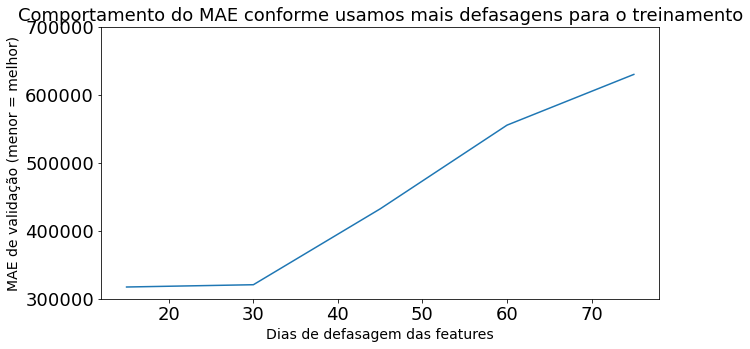

In [200]:
# Exemplo de bases com muitas features
plt.figure(figsize=(10,5))
plt.plot(*zip(*avaliacao))
plt.xlabel('Dias de defasagem das features',size=14)
plt.ylabel('MAE de validação (menor = melhor)',size=14)
plt.ylim([300000,700000])
plt.title('Comportamento do MAE conforme usamos mais defasagens para o treinamento',size=18)
plt.show()

In [198]:
avaliacao

[(15, 317359.3045825457),
 (30, 320715.6731110088),
 (45, 432398.71090281196),
 (60, 555562.7989918471),
 (75, 630236.1021033751)]

Pelo gráfico acima, vemos que usando mais features defasadas não ganhamos tanta performance. Sendo assim, vamos travar 15 dias

In [201]:
base_final = dataprep(acucar,15,30)
X = base_final.drop('target',axis=1)
y = base_final.target

# Temos quatro anos na base (2019-2022), então iremos separar os últimos 9 meses para teste
corte_treino_teste = '2021-09-01'

X_train = X[X.index<=corte_treino_teste]
X_test = X[X.index>corte_treino_teste]

y_train = y[y.index<=corte_treino_teste]
y_test = y[y.index>corte_treino_teste]

print('Tamanho do treino '+str(len(X_train)))
print('Tamanho do teste '+str(len(X_test)))

Tamanho do treino 314
Tamanho do teste 89


A escolha da métrica: comparações relativas
Um dos pontos mais importantes da validação cruzada de séries temporais é a escolha da métrica. Isso importa bastante pois o tamanho do conjunto de treino varia a cada iteração

Vamos avaliar isso usando o cross_val_score

In [202]:
scores = -cross_val_score(LGBMRegressor(), # Escolhendo o nosso modelo da vez
                    X_train, y_train, # Nossos dados, excluindo o teste
                    cv=TimeSeriesSplit(n_splits=10), # Validação cruzada temporal
                    scoring='neg_mean_absolute_error', # Usando a métrica MAE
                   n_jobs=8 # Número de processadores, para rodar mais rápido
                         ) # Tirando a média de todos os folds


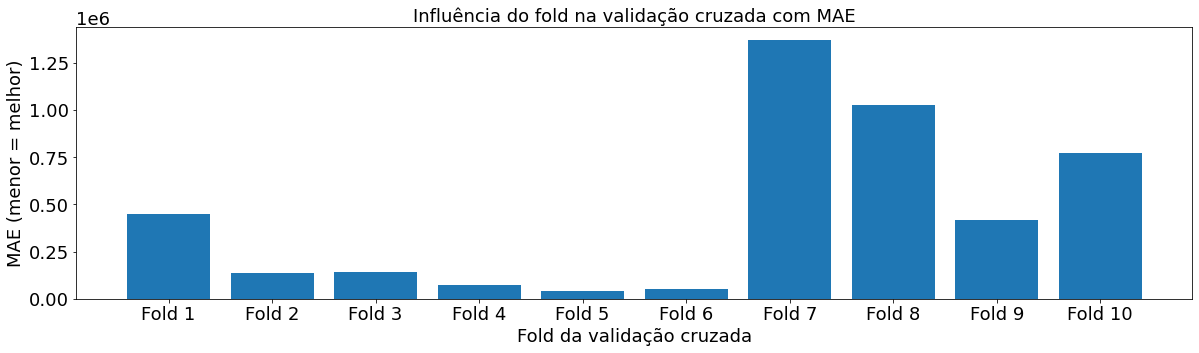

In [203]:
plt.figure(figsize=(20,5))
plt.bar(height=scores,x=['Fold '+str(i) for i in range(1,11)])
plt.xlabel('Fold da validação cruzada',size=18)
plt.ylabel('MAE (menor = melhor)',size=18)
plt.title('Influência do fold na validação cruzada com MAE',size=18)
plt.show()

De alguma maneira, quanto menos dados temos para treinar o modelo, mais underfitting teremos, e a nossa métrica precisa ser robusta a isso para evitarmos conclusões incorretas!
Uma solução simples para isso é comparar a nossa métrica com a métrica de um modelo de base. No caso do r2_score, o modelo de base é uma média simples da variável resposta. Vamos então calcular para todos os dados a média móvel do período de defasagem para o passado, e usar a métrica deste modelo "simples" para avaliar o nosso!

In [204]:
y_mediamovel = y_test.rolling(window=15,closed='left').mean().dropna() #Eliminando dias sem média móvel

# Selecionando para validação os mesmos índices
X_valid = X.loc[y_mediamovel.index]
y_valid = y.loc[y_mediamovel.index]


Vamos agora repetir a validação cruzada com Time Series, agora comparando nossa métrica com a da média móvel

In [205]:
X_valid

quantidade_negociada  fator_conversao  valor_cotacao     usd  \
data_referencia                                                                 
2021-09-29               5.600000e+06             0.01       0.175715  5.4173   
2021-09-30               4.640000e+06             0.01       0.179200  5.4394   
2021-10-06               6.720000e+06             0.01       0.163333  5.5097   
2021-10-08               8.000000e+06             0.01       0.171125  5.5084   
2021-10-11               4.480000e+06             0.01       0.177508  5.5161   
...                               ...              ...            ...     ...   
2022-04-28               5.600000e+05             0.01       0.184092  5.0110   
2022-05-04               1.866667e+06             0.01       0.185517  5.0093   
2022-05-05               3.360000e+06             0.01       0.182091  5.0051   
2022-05-13               1.120000e+06             0.01       0.184427  5.1075   
2022-05-17               2.240000e+06             0.01       0.190918  4.9676   

                 notional_usd  notional_brl  ipca  ipca_acumulado  \
data_referencia                                                     
2021-09-29       9.840062e+05  5.330657e+06  1.16           15.37   
2021-09-30       8.314880e+05  4.522796e+06  1.16           15.37   
2021-10-06       1.097600e+06  6.047447e+06  1.25           16.62   
2021-10-08       1.369000e+06  7.541000e+06  1.25           16.62   
2021-10-11       7.952373e+05  4.386609e+06  1.25           16.62   
...                       ...           ...   ...             ...   
2022-04-28       1.030913e+05  5.165907e+05  1.06           22.53   
2022-05-04       3.462978e+05  1.734709e+06  0.47           23.00   
2022-05-05       6.118255e+05  3.062248e+06  0.47           23.00   
2022-05-13       2.065585e+05  1.054998e+06  0.47           23.00   
2022-05-17       4.276567e+05  2.124428e+06  0.47           23.00   

                 notionalusd_ipca  notionalusd_norm  ...  \
data_referencia                                      ...   
2021-09-29           74264.615385         -0.112728  ...   
2021-09-30           62753.811321         -0.124854  ...   
2021-10-06           82551.143201         -0.103697  ...   
2021-10-08          102963.297232         -0.082119  ...   
2021-10-11           59810.268753         -0.127736  ...   
...                           ...               ...  ...   
2022-04-28            4850.280219         -0.182765  ...   
2022-05-04            7076.519807         -0.163429  ...   
2022-05-05           12502.520158         -0.142318  ...   
2022-05-13            4220.978972         -0.174539  ...   
2022-05-17            8739.072253         -0.156961  ...   

                 ipca_acumulado_def_6  ipca_acumulado_def_7  \
data_referencia                                               
2021-09-29                      15.37                 15.37   
2021-09-30                      15.37                 15.37   
2021-10-06                      15.37                 15.37   
2021-10-08                      15.37                 15.37   
2021-10-11                      15.37                 15.37   
...                               ...                   ...   
2022-04-28                      22.53                 22.53   
2022-05-04                      22.53                 22.53   
2022-05-05                      22.53                 22.53   
2022-05-13                      22.53                 22.53   
2022-05-17                      22.53                 22.53   

                 ipca_acumulado_def_8  ipca_acumulado_def_9  \
data_referencia                                               
2021-09-29                      15.37                 15.37   
2021-09-30                      15.37                 15.37   
2021-10-06                      15.37                 15.37   
2021-10-08                      15.37                 15.37   
2021-10-11                      15.37                 15.37   
...                    

In [206]:
metricas = []
for index_train, index_test in TimeSeriesSplit(n_splits=10).split(X_valid,y_valid):
    # Dados de treino
    x_tr = X_valid.iloc[index_train]
    y_tr = y_valid.iloc[index_train]
    x_te = X_valid.iloc[index_test]
    y_te = y_valid.iloc[index_test]
    y_mdmv = y_mediamovel[index_test]
    # Treinando um modelo e ajustando aos dados de treino
    model = LGBMRegressor().fit(x_tr,y_tr)
    # Prevendo nos dados de teste
    y_pr = model.predict(x_te)
    # Calculando a métrica (MAE) no teste 
    mae_model = mean_absolute_error(y_te,y_pr)
    mae_mdmv = mean_absolute_error(y_te,y_mdmv)
    mae_relativo = mae_model/mae_mdmv
    metricas.append(mae_relativo)

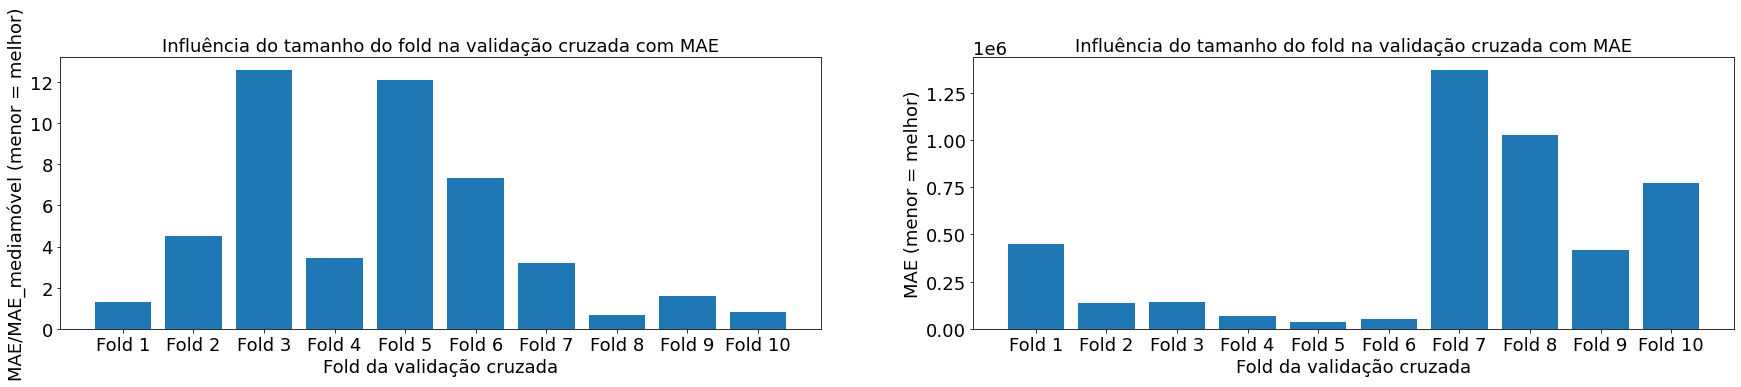

In [207]:
fig, ax = plt.subplots(1,2, figsize=(30,5))
ax[0].bar(height=metricas,x=['Fold '+str(i) for i in range(1,11)])
ax[0].set_xlabel('Fold da validação cruzada',size=18)
ax[0].set_ylabel('MAE/MAE_mediamóvel (menor = melhor)',size=18)
ax[0].set_title('Influência do tamanho do fold na validação cruzada com MAE',size=18)
ax[1].bar(height=scores,x=['Fold '+str(i) for i in range(1,11)])
ax[1].set_xlabel('Fold da validação cruzada',size=18)
ax[1].set_ylabel('MAE (menor = melhor)',size=18)
ax[1].set_title('Influência do tamanho do fold na validação cruzada com MAE',size=18)
plt.show()

Otimização de Hiperparâmetros e modelo final
Agora com nosso modelo escolhido, vamos otimizar os hiperparâmetros e plotar nosso modelo final! Para isso, vamos usar o GridSearchCV específico para o RandomForestRegressor

In [208]:
param_grid = {
'learning_rate':[.1,.15,.2,.25,.3],
'n_estimators':[10,100,150,200,300],
'num_leaves':[20,220,260,300,400]
}


In [209]:
#instanciar o modelo

In [210]:
from sklearn.model_selection import GridSearchCV

In [211]:
rcv = GridSearchCV(LGBMRegressor(),param_grid=param_grid,cv=TimeSeriesSplit(n_splits=3),
                        scoring='neg_mean_absolute_error',verbose=True,n_jobs=8)
rcv.fit(X,y)

rcv.best_params_

Fitting 3 folds for each of 125 candidates, totalling 375 fits


{'learning_rate': 0.25, 'n_estimators': 10, 'num_leaves': 20}

In [212]:
melhores_parametros = {
'learning_rate':0.25,
'n_estimators':10,
'num_leaves':20
}

In [213]:
modelo = LGBMRegressor(**melhores_parametros).fit(X_train,y_train)
y_pred_final = pd.Series(modelo.predict(X),index=X.index)

<AxesSubplot:xlabel='data_referencia'>

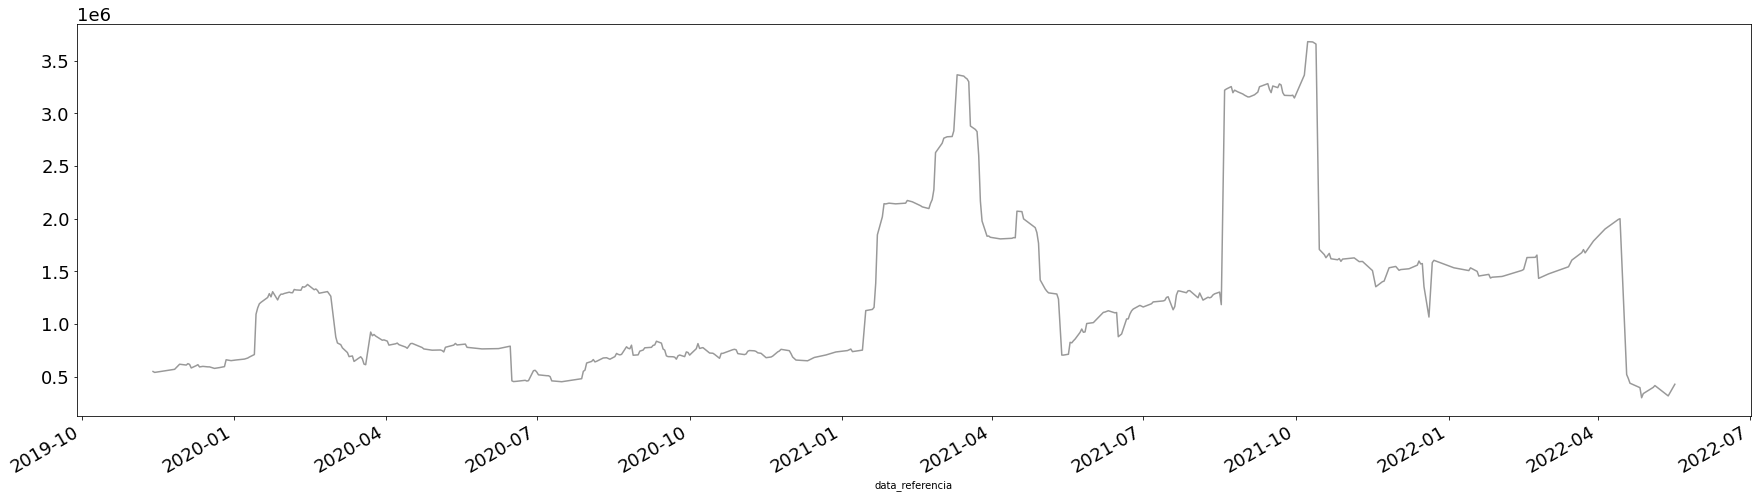

In [214]:
plt.figure(figsize=(30,8))
y.plot(c='grey',alpha=0.8) # Dados reais

In [215]:
# Plotando os dados de treino e teste para 6 meses do conjunto de teste

In [216]:
x_pl = X[(X.index>='2021-12-15') & (X.index<='2022-05-17')]

y_plot = y[x_pl.index]
y_preds = y_pred_final[x_pl.index]
y_mdmv_plot = y_mediamovel[x_pl.index]

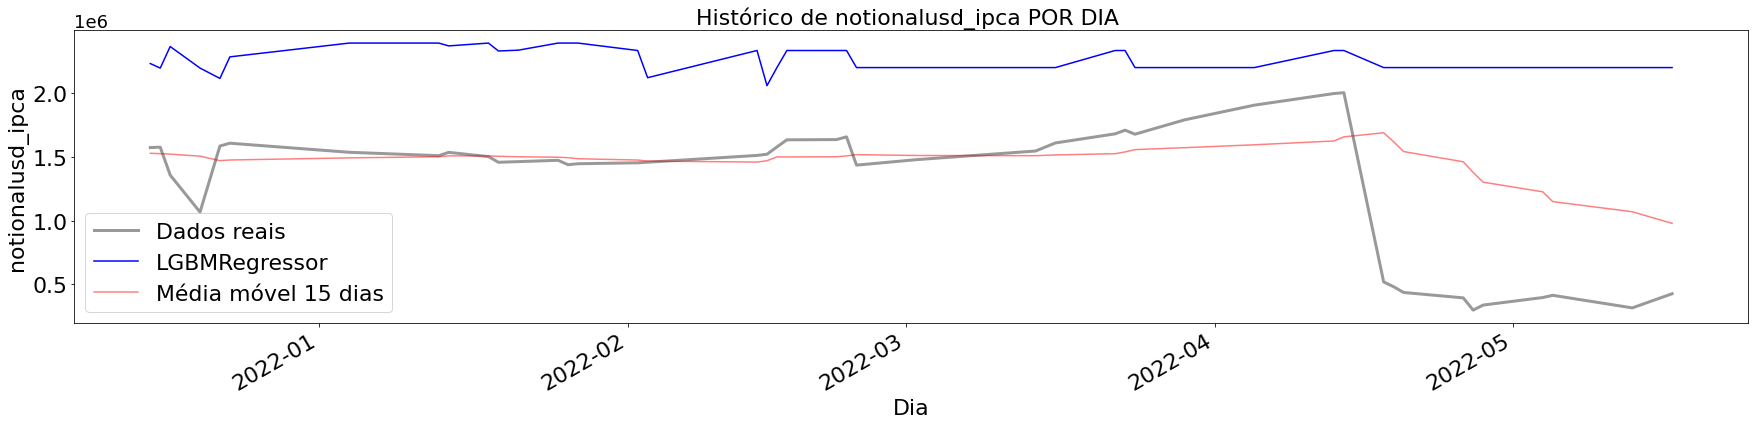

In [218]:
plt.figure(figsize=(30,6))
y_plot.plot(c='grey',alpha=0.8,linewidth=3) # Dados reais
y_preds.plot(c='blue') # Dados reais
y_mdmv_plot.plot(c='red',alpha=0.5) # Dados reais
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Dia',size=22)
plt.ylabel('notionalusd_ipca',size=22)
plt.title('Histórico de notionalusd_ipca POR DIA ',size=22)
plt.legend(['Dados reais','LGBMRegressor','Média móvel 15 dias'],fontsize=22)
plt.show()

In [219]:
y_train_pred = modelo.predict(X_train)
print('Performance do melhor LGBMRegressor no treino')
print(mean_absolute_error(y_train,y_train_pred))
# Calculando a métrica no teste
y_test_pred = modelo.predict(X_test)
print('Performance do melhor LGBMRegressor no teste')
print(mean_absolute_error(y_test,y_test_pred))

Performance do melhor LGBMRegressor no treino
94539.68270656065
Performance do melhor LGBMRegressor no teste
986005.8066923879


Não tivemos uma performace boa com o LGBMRegressor

In [220]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM # Long Short Term Memory
from keras.layers import Bidirectional
from keras.layers import Dropout # Regularização
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping # Regularização

Usando o Keras, podemos construir uma rede neural adicionando camadas uma após a outra, de forma que no fim o modelo irá treinar os melhores pesos que resolvem o nosso problema. Apenas para recapitular:

Construímos nossa variável resposta como sendo o valor médio de notionalusd_ipca 30 dias seguintes
Consideramos features 45 anteriores
Até o momento, nenhum modelo entende que essa ordem existe
Quando adicionamos uma camada LSTM(Long Short Term Memory) à rede neural, estamos dizendo que a ordem dos dados deve afetar a resposta, poranto iremos ganhar uma nova camada de impacto em relação aos demais modelos

Para treinar um modelo no Keras, por ser uma rede neural, temos que fazer mais dois tratamentos:

Escala dos dados, pois não é um modelo robusto a escala
Adicionar uma dimensão (para se tornar um tensor), mesmo que tenha dimensão 1

In [221]:
# Treinando um escalador
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
X_test_sc = sc.transform(X_test).reshape(X_test.shape[0],1,X_test.shape[1])

No keras, primeiro instanciamos nosso objeto Rede Neural, para então treiná-lo. Para isso, temos que definir algumas coisas:

Quantas (e quais) camadas nossa rede terá, usando o comando .add()
Compilar a rede (i.e., 'juntar' as camadas, definindo uma função custo e uma otimização, usando o comando .compile()

In [222]:
# Construindo a estrutura da rede neural
callback = EarlyStopping(monitor='val_loss', patience=3)

model = Sequential() # Vamos construir uma rede sequencial
model.add(
    Bidirectional(LSTM(units=50,input_shape=(X_train_sc.shape[1],X_train_sc.shape[2]))) # Camada LSTM (com memória), bidirecional!
) # Camada de rede neural com memória
model.add(Dropout(rate=0.2)) # Camada de 'esquecimento' de atualização de pesos, para regularização!
model.add(Dense(1)) # Adicionando uma camada que resulta em um output (variável resposta) único
model.compile(loss='mae', optimizer='adam') # Vou minimizar a o MAE, usando a técnica Adam

Aqui vamos usar um modo em que o modelo nos diz a função custo a cada iteração

In [223]:
# fit network
history = model.fit(
    X_train_sc, y_train, # Dados de treino
    epochs=50, # Número de iterações, i.e., quantas vezes irei atualizar os coeficientes
    batch_size=36, # Tamanho dos dados de entrada a cada iteração
    validation_data=(X_test_sc, y_test), # Dados que o modelo já usará para a validação
    verbose=2, # Forma de apresentar os resultados parciais
    shuffle=False, # Como os dados são temporais, não posso embaralhar!
    callbacks=[callback] # Critérios de parada
)


Epoch 1/50
9/9 - 6s - loss: 1140237.7500 - val_loss: 1853890.5000 - 6s/epoch - 655ms/step
Epoch 2/50
9/9 - 0s - loss: 1140237.3750 - val_loss: 1853890.0000 - 46ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1140237.1250 - val_loss: 1853889.5000 - 48ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1140236.7500 - val_loss: 1853888.7500 - 47ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 1140236.3750 - val_loss: 1853888.3750 - 47ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 1140236.0000 - val_loss: 1853887.8750 - 47ms/epoch - 5ms/step
Epoch 7/50
9/9 - 0s - loss: 1140235.3750 - val_loss: 1853887.5000 - 46ms/epoch - 5ms/step
Epoch 8/50
9/9 - 0s - loss: 1140235.0000 - val_loss: 1853887.1250 - 46ms/epoch - 5ms/step
Epoch 9/50
9/9 - 0s - loss: 1140234.3750 - val_loss: 1853886.7500 - 46ms/epoch - 5ms/step
Epoch 10/50
9/9 - 0s - loss: 1140233.8750 - val_loss: 1853886.3750 - 49ms/epoch - 5ms/step
Epoch 11/50
9/9 - 0s - loss: 1140233.3750 - val_loss: 1853886.2500 - 49ms/epoch - 5ms/step
Epoch 12

Plotar a função custo (MAE), no treino e no teste, ao longo das iterações

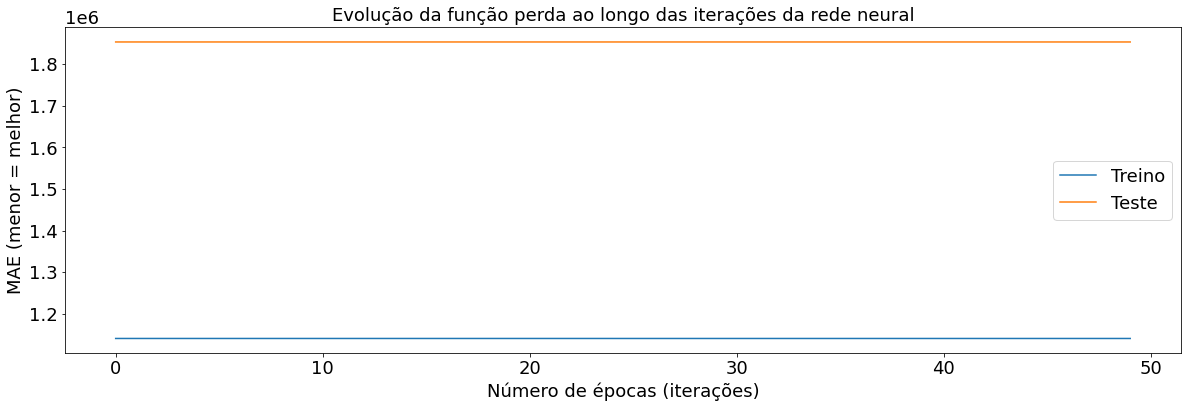

In [224]:
# plot history
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Número de épocas (iterações)',size=18)
plt.ylabel('MAE (menor = melhor)',size=18)
plt.title('Evolução da função perda ao longo das iterações da rede neural',size=18)
plt.legend(['Treino','Teste'],fontsize=18)
plt.show()

Para fazer previsões, usamos o .predict(), similar aos modelos em scikit-learn

In [225]:
y_pred_nn_train = model.predict(X_train_sc)
y_pred_nn_test = model.predict(X_test_sc)

3/3 [==============================] - 0s 2ms/step


In [226]:
X_train['pred_nn'] = y_pred_nn_train
X_test['pred_nn'] = y_pred_nn_test
# Prevendo o modelo
y_pred_nn_train = X_train['pred_nn']
y_pred_nn_test = X_test['pred_nn']
# Eliminando colunas auxiliares
X_train.drop('pred_nn',axis=1,inplace=True)
X_test.drop('pred_nn',axis=1,inplace=True)

Vamos comparar essa nova performance do modelo LSTM com as que já tínhamos

In [227]:
mae_mdmv = mean_absolute_error(y_valid,y_mediamovel)
y_lstm = pd.Series(y_test_pred,index=y_test.index)
mae_lgbm = mean_absolute_error(y_valid,y_lstm[y_valid.index])
mae_nn = mean_absolute_error(y_valid,y_pred_nn_test[y_valid.index])

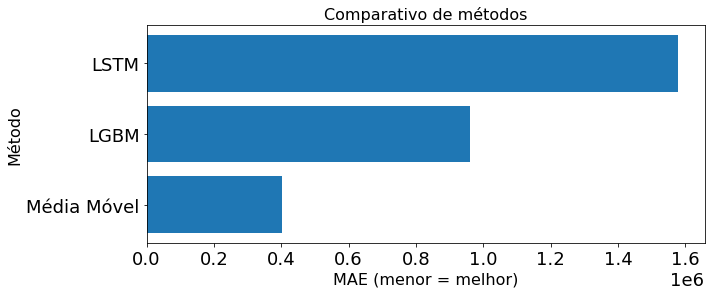

In [228]:
# Plotando os gráficos
performances = [mae_mdmv,mae_lgbm,mae_nn]
plt.figure(figsize=(10,4))
plt.barh(['Média Móvel','LGBM','LSTM'],performances)
plt.ylabel('Método',size=16)
plt.xlabel('MAE (menor = melhor)',size=16)
plt.title('Comparativo de métodos',size=16)
plt.show()

Vamos complementar nosso plot com a rede neural

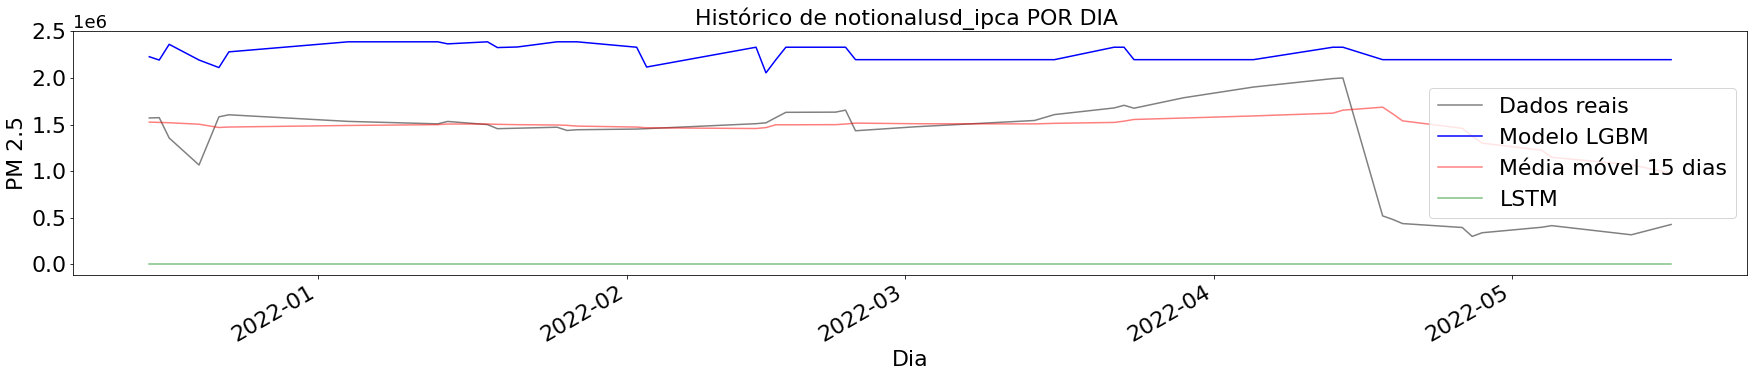

In [230]:
y_nn_plot = y_pred_nn_test[x_pl.index]

plt.figure(figsize=(30,5))
y_plot.plot(c='grey') # Dados reais
y_preds.plot(c='blue') # Dados reais
y_mdmv_plot.plot(c='red',alpha=0.5) # Dados reais
y_nn_plot.plot(c='green',alpha=0.5) # Dados reais
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Dia',size=22)
plt.ylabel('PM 2.5',size=22)
plt.title('Histórico de notionalusd_ipca POR DIA ',size=22)
plt.legend(['Dados reais','Modelo LGBM','Média móvel 15 dias','LSTM'],fontsize=22)
plt.show()